# 01 San Francisco Forecast

![](https://images.unsplash.com/photo-1449034446853-66c86144b0ad?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Joseph Barrientos](https://unsplash.com/photos/Ji_G7Bu1MoM)

In this exercise, you will predict the weather of the city of San Francisco! In the first step, we would predict the temperature, knowing the information of the past days.

First load the dataset contained in `San_Francisco.csv`.

In [1]:
# TODO: Load the dataset
### STRIP_START ###
import pandas as pd
df = pd.read_csv('San_Francisco.csv')
print("shape:", df.shape)
df.head()
### STRIP_END ###

shape: (45253, 7)


,datetime,Humidity,Pressure,Temperature,Description,Wind direction,Wind speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,light rain,150.0,2.0
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,sky is clear,147.0,2.0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,sky is clear,141.0,2.0
4,2012-10-01 16:00:00,85.0,1009.0,289.446243,sky is clear,135.0,2.0


Explore the dataset, make the data preparation.

In [2]:
# TODO: Make an EDA and data preparation
### STRIP_START ###
df = df.dropna()
df.shape
### STRIP_END ###

(44304, 7)

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(df['datetime'], df['Pressure'])
plt.xlabel('date')
plt.ylabel('Pressure (hPa)')
plt.show()

<Figure size 640x480 with 1 Axes>

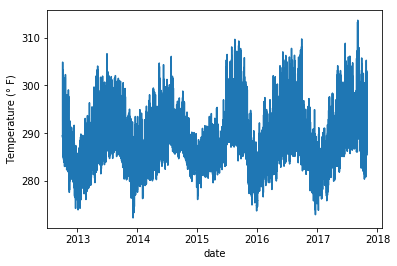

In [5]:
plt.plot(df['datetime'], df['Temperature'])
plt.xlabel('date')
plt.ylabel('Temperature (° F)')
plt.show()

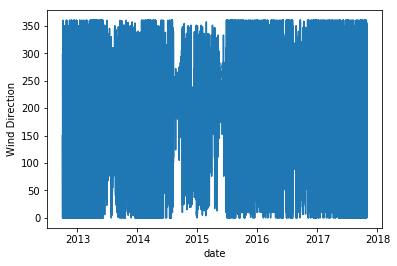

In [6]:
plt.plot(df['datetime'], df['Wind direction'])
plt.xlabel('date')
plt.ylabel('Wind Direction')
plt.show()

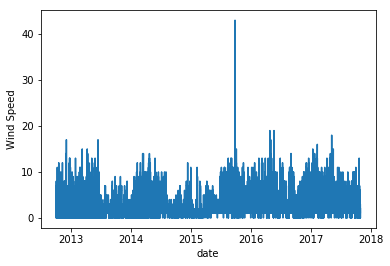

In [7]:
plt.plot(df['datetime'], df['Wind speed'])
plt.xlabel('date')
plt.ylabel('Wind Speed')
plt.show()

In [8]:
df.columns

Index(['datetime', 'Humidity', 'Pressure', 'Temperature', 'Description',
       'Wind direction', 'Wind speed'],
      dtype='object')

In [39]:
# Rescale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = df[['Humidity', 'Pressure', 'Temperature', 'Wind direction', 'Wind speed']]
data = pd.DataFrame(scaler.fit_transform(data), columns=['Humidity', 'Pressure', 'Temperature', 'Wind direction', 'Wind speed'])

# # Dummify
# dummies = pd.get_dummies(df['Description'], drop_first=True)
# dummies.shape

# # Concatenate
# dummies.index = data.index
# data = pd.concat([data, dummies], axis=1)
# data.shape

In [40]:
data.head()

,Humidity,Pressure,Temperature,Wind direction,Wind speed
0,0.639520,-1.341638,0.247034,-0.620076,-0.344767
1,0.582027,-1.341638,0.246094,-0.651470,-0.344767
2,0.524534,-1.341638,0.243397,-0.714259,-0.344767
3,0.467041,-1.341638,0.240700,-0.777048,-0.344767
4,0.409548,-1.341638,0.238002,-0.839837,-0.344767


As you did for the stock forecast, you will need to compute the `X` and `y` data.

`X` will be all the features, of the past half day for example (the number of past days can be modified). `y` will be the temperature of the current day.

In [42]:
# TODO: Compute X and y
### STRIP_START ###
import numpy as np

def processData(data, past):
    X = []
    for i in range(len(data)-past-1):
        X.append(data.iloc[i:i+past].values)

    return np.array(X)

lookback = 24 # meaning a day

y = df['Temperature'][lookback+1:] 
X = processData(data, lookback)
X.shape, y.shape
### STRIP_END ###

((44279, 24, 5), (44279,))

Now build a RNN model that will allow to predict the temperature, knowing the information of the past half day (or more if you chose more!).

Then compile it, fit it on a train dataset.

In [43]:
# TODO: Build and fit a RNN model
### STRIP_START ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

def my_GRU(input_shape):

    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, activation='relu', input_shape=input_shape))
    model.add(GRU(units=32, activation='relu', return_sequences=False))
    model.add(Dense(units=1, activation='linear'))

    return model

model = my_GRU(X.shape[1:])

model.compile(optimizer='adam',
              loss='mean_squared_error')


X_train = X[:40000]
y_train = y[:40000]
X_test = X[40000:]
y_test = y[40000:]


model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)
### STRIP_END ###

Train on 40000 samples, validate on 4279 samples
Epoch 1/30
40000/40000 [==============================] - 28s 688us/sample - loss: 4440.6647 - val_loss: 12.5025
Epoch 2/30
40000/40000 [==============================] - 26s 651us/sample - loss: 11.2894 - val_loss: 8.7807
Epoch 3/30
40000/40000 [==============================] - 26s 651us/sample - loss: 7.8460 - val_loss: 6.8445
Epoch 4/30
40000/40000 [==============================] - 26s 651us/sample - loss: 6.6931 - val_loss: 11.9485
Epoch 5/30
40000/40000 [==============================] - 27s 667us/sample - loss: 5.9148 - val_loss: 4.5281
Epoch 6/30
40000/40000 [==============================] - 27s 664us/sample - loss: 4.8935 - val_loss: 3.0832
Epoch 7/30
40000/40000 [==============================] - 27s 674us/sample - loss: 5.0178 - val_loss: 3.9977
Epoch 8/30
40000/40000 [==============================] - 27s 664us/sample - loss: 4.1850 - val_loss: 2.4592
Epoch 9/30
40000/40000 [==============================] - 27s 666us/sampl

Finally, plot the results and compare it to the test data.

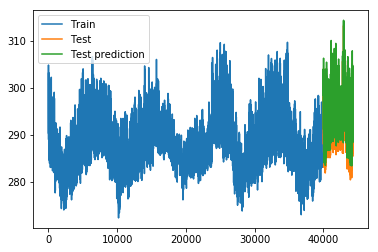

In [44]:
# TODO: Plot the results
### STRIP_START ###
plt.plot(np.arange(len(X_train)), y_train, label='Train')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
plt.legend()
plt.show()
### STRIP_END ###

To go further, you can of course tune hyperparameters and the number of previous time steps you use.

You can also try to add information from other cities (coming from [that dataset](https://www.kaggle.com/selfishgene/historical-hourly-weather-data)). 

Finally, you can also try to handle carefully the missing data, if you did not already!